In [1]:
!pip install pmdarima

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [76]:
import statsmodels.api

In [77]:
df = pd.read_csv("C:\\Users\\91996\\Desktop\\sky rose.csv")

In [78]:
print ("shape of data" , df.shape)

shape of data (72, 3)


In [79]:
df['date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

In [80]:
df['date'] = pd.DatetimeIndex(df['date'])

In [81]:
df.head()

,Year,Month,Relative Interest,date
0,2010,1,6,2010-01-01
1,2010,2,9,2010-02-01
2,2010,3,15,2010-03-01
3,2010,4,12,2010-04-01
4,2010,5,17,2010-05-01


In [82]:
df1=df[["date","Relative Interest"]]
df1.head()

,date,Relative Interest
0,2010-01-01,6
1,2010-02-01,9
2,2010-03-01,15
3,2010-04-01,12
4,2010-05-01,17


In [83]:
df1.set_index('date',inplace=True)

In [84]:
df1.head()

,Relative Interest
date,
2010-01-01,6
2010-02-01,9
2010-03-01,15
2010-04-01,12
2010-05-01,17


In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [86]:
decompose_df1 = seasonal_decompose(df1['Relative Interest'],model ="additive")

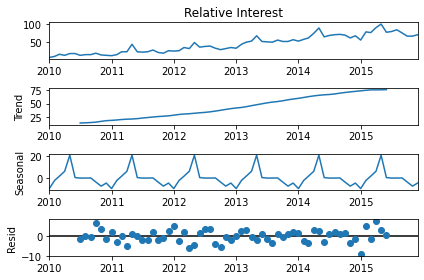

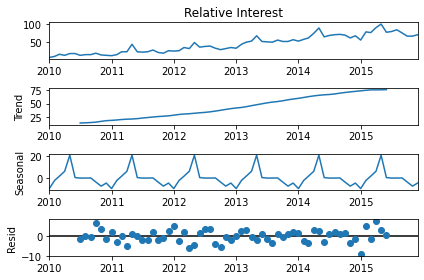

In [87]:
decompose_df1.plot()

In [88]:
#visualize

<AxesSubplot:xlabel='date'>

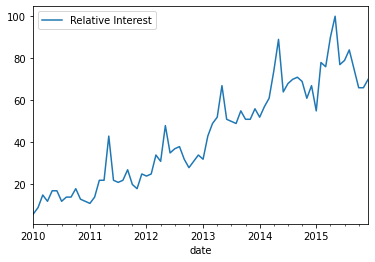

In [89]:
df1.plot()

In [90]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [91]:
test_result=adfuller(df1['Relative Interest'])

In [92]:
from statsmodels.tsa.stattools import adfuller
def ad_test(test_result):
     dftest = adfuller(test_result, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [93]:
ad_test(df1['Relative Interest'])

1. ADF :  -0.016032165408751943
2. P-Value :  0.9571859840134864
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 59
5. Critical Values :
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


In [94]:
#log

In [95]:
df_log = np.log(df1['Relative Interest'])

In [96]:
ad_test(df_log)

1. ADF :  -3.5705399187596427
2. P-Value :  0.006349871218936703
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 59
5. Critical Values :
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


<AxesSubplot:xlabel='date'>

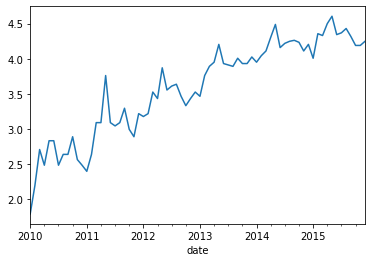

In [97]:
df_log.plot()

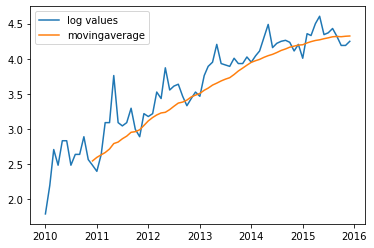

In [98]:
movingaverage = df_log.rolling(window=12).mean()
movingstd = df_log.rolling(window=12).std()
plt.plot(df_log,label='log values')
plt.plot(movingaverage,label='movingaverage')
plt.legend(loc='best')

In [99]:
#differencing

In [100]:
df1[' First Difference'] = df1['Relative Interest'] - df1['Relative Interest'].shift(1)

C:\Users\91996\AppData\Local\Temp\ipykernel_27240\1952995168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[' First Difference'] = df1['Relative Interest'] - df1['Relative Interest'].shift(1)


In [101]:
df1['Relative Interest'].shift(1)

date
2010-01-01     NaN
2010-02-01     6.0
2010-03-01     9.0
2010-04-01    15.0
2010-05-01    12.0
              ... 
2015-08-01    79.0
2015-09-01    84.0
2015-10-01    75.0
2015-11-01    66.0
2015-12-01    66.0
Name: Relative Interest, Length: 72, dtype: float64

In [102]:
df1['Seasonal  Difference']=df1['Relative Interest']-df1['Relative Interest'].shift(12)

C:\Users\91996\AppData\Local\Temp\ipykernel_27240\2363028736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Seasonal  Difference']=df1['Relative Interest']-df1['Relative Interest'].shift(12)


In [103]:
df1.head(14)

,Relative Interest,First Difference,Seasonal Difference
date,,,
2010-01-01,6,NaN,NaN
2010-02-01,9,3.0,NaN
2010-03-01,15,6.0,NaN
2010-04-01,12,-3.0,NaN
2010-05-01,17,5.0,NaN
2010-06-01,17,0.0,NaN
2010-07-01,12,-5.0,NaN
2010-08-01,14,2.0,NaN
2010-09-01,14,0.0,NaN


In [104]:
df1=df1.dropna()

In [105]:
## Again test dickey fuller test
ad_test(df1['Seasonal  Difference'].dropna())

1. ADF :  -4.674412141746855
2. P-Value :  9.397693723215344e-05
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 59
5. Critical Values :
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


<AxesSubplot:xlabel='date'>

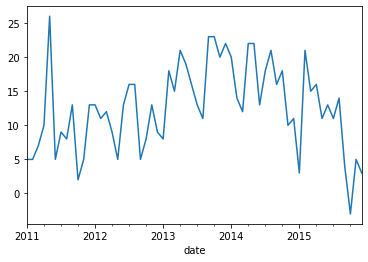

In [106]:
df1['Seasonal  Difference'].plot()

In [109]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [112]:
import statsmodels.api as sm

D:\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


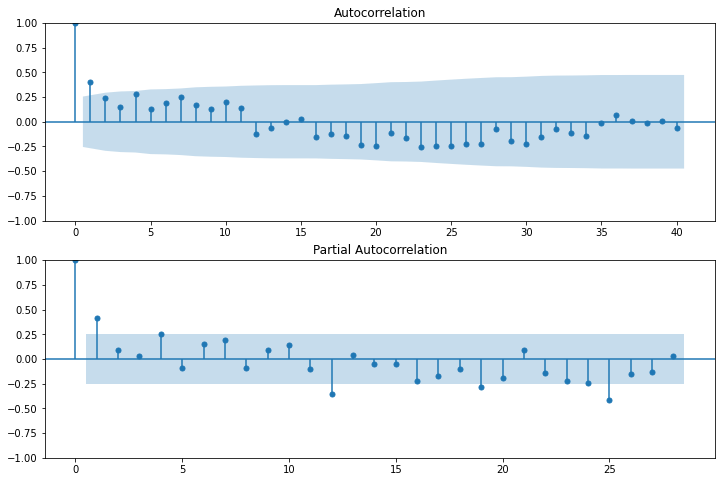

In [187]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['Seasonal  Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['Seasonal  Difference'].iloc[13:],lags=28,ax=ax2)

In [68]:
#ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA

In [69]:
model=ARIMA(df1['Relative Interest'],order=(1,1,1))
model_fit=model.fit()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [70]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Relative Interest   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -213.459
Date:                Wed, 09 Nov 2022   AIC                            432.918
Time:                        02:39:14   BIC                            439.151
Sample:                    01-01-2011   HQIC                           435.351
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0091      0.571      0.016      0.987      -1.110       1.128
ma.L1         -0.3480      0.464     -0.750      0.453      -1.258       0.562
sigma2        81.1202     15.621      5.193      0.000      50.504     111.737
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.81   Prob(JB):                         0.75
Heteroskedasticity (H):               1.74   Skew:                             0.24
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\91996\AppData\Local\Temp\ipykernel_27240\2294491867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['forecast']=model_fit.predict(start=52,end=103,dynamic=True)


<AxesSubplot:xlabel='date'>

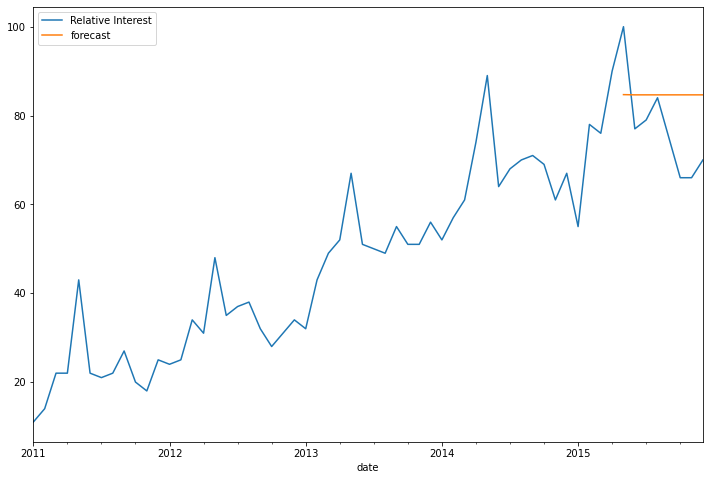

In [71]:
df1['forecast']=model_fit.predict(start=52,end=103,dynamic=True)
df1[['Relative Interest','forecast']].plot(figsize=(12,8))

In [72]:
import statsmodels.api as sm

In [73]:
model=sm.tsa.statespace.SARIMAX(df1['Relative Interest'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


C:\Users\91996\AppData\Local\Temp\ipykernel_27240\2217925629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['forecast']=results.predict(start=52,end=103,dynamic=True)


<AxesSubplot:xlabel='date'>

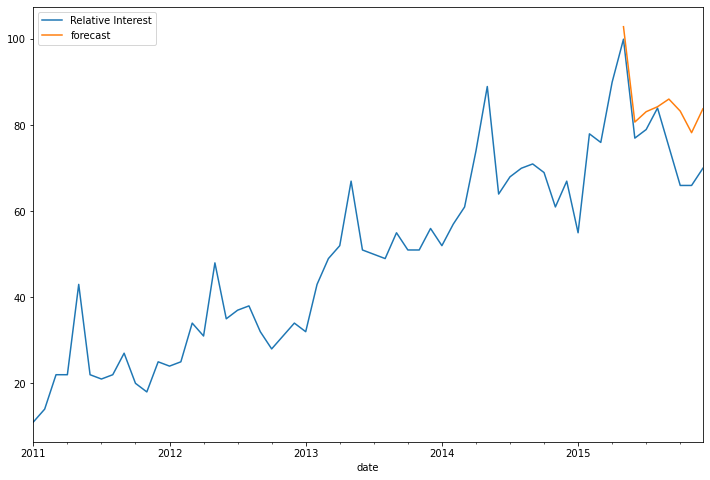

In [74]:
df1['forecast']=results.predict(start=52,end=103,dynamic=True)
df1[['Relative Interest','forecast']].plot(figsize=(12,8))

In [192]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [193]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [194]:
future_datest_df.tail()

,Relative Interest,First Difference,Seasonal Difference,forecast
2017-07-01,NaN,NaN,NaN,NaN
2017-08-01,NaN,NaN,NaN,NaN
2017-09-01,NaN,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN,NaN
2017-11-01,NaN,NaN,NaN,NaN


In [195]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

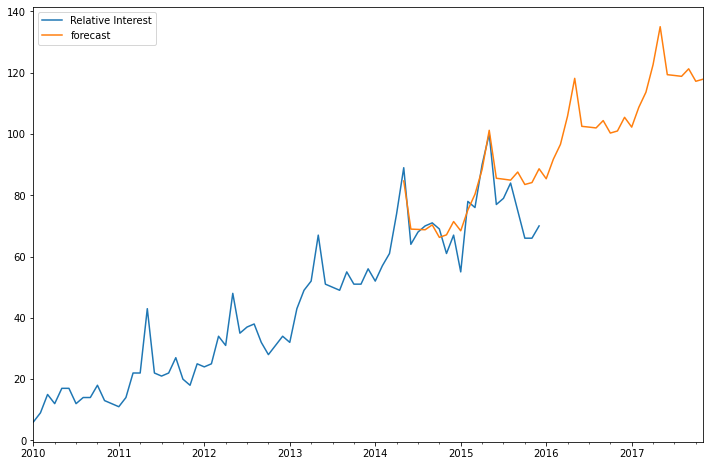

In [198]:
future_df['forecast'] = results.predict(start = 52, end = 120, dynamic= True)  
future_df[['Relative Interest', 'forecast']].plot(figsize=(12, 8)) 

In [197]:
future_df

,Relative Interest,First Difference,Seasonal Difference,forecast
2010-01-01,6,NaN,NaN,NaN
2010-02-01,9,3.0,NaN,NaN
2010-03-01,15,6.0,NaN,NaN
2010-04-01,12,-3.0,NaN,NaN
2010-05-01,17,5.0,NaN,NaN
...,...,...,...,...
2017-07-01,NaN,NaN,NaN,94.622999
2017-08-01,NaN,NaN,NaN,98.436557
2017-09-01,NaN,NaN,NaN,93.005415
2017-10-01,NaN,NaN,NaN,86.221709
